### Fiona Fan

In [14]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import cmath
from scipy import linalg as la 

Problem 1

In [15]:
def p1(A, b): 
    Q, R = la.qr(A, mode='economic')
    n = len(R)
    y = Q.T @ b    
    x = la.solve_triangular(R, Q.T @ b)     
    return x

In [16]:
A = np.random.random((3, 3))
b = np.ones(3)
p1(A,b)

array([0.09620572, 1.04594293, 0.42109038])

Problem 2

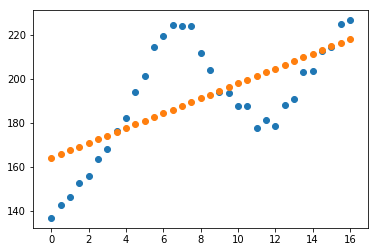

In [17]:
data = np.load('housing.npy')
b = data[:, 1]
A = np.array([data[:, 0], np.ones(len(data))]).T
sigma = p1(A, b)
y = A @ sigma  
x = data[:, 0]
plt.scatter(x, data[:, 1])
plt.scatter(x, y)
plt.show()

Problem 3

In [18]:
def p3():
    fig, ax = plt.subplots(2,2,sharex='all', sharey='all',figsize=(13, 10)) 
    degree=np.array([3,6,9,12])
    for i in range(0,2):
        A = np.vander(data[:, 0], degree[i]+1)
        sigma = np.polyfit(data[:, 0], data[:, 1], degree[i])
        y = A @ sigma
        ax[0,i].scatter(x, y)
        ax[0,i].scatter(x, data[:, 1])
    for i in range(2,4):
        A = np.vander(data[:, 0], degree[i]+1)
        sigma = np.polyfit(data[:, 0], data[:, 1], degree[i])
        y = A @ sigma
        ax[1,i-2].scatter(x, y)
        ax[1,i-2].scatter(x, data[:, 1])
    plt.show()
    

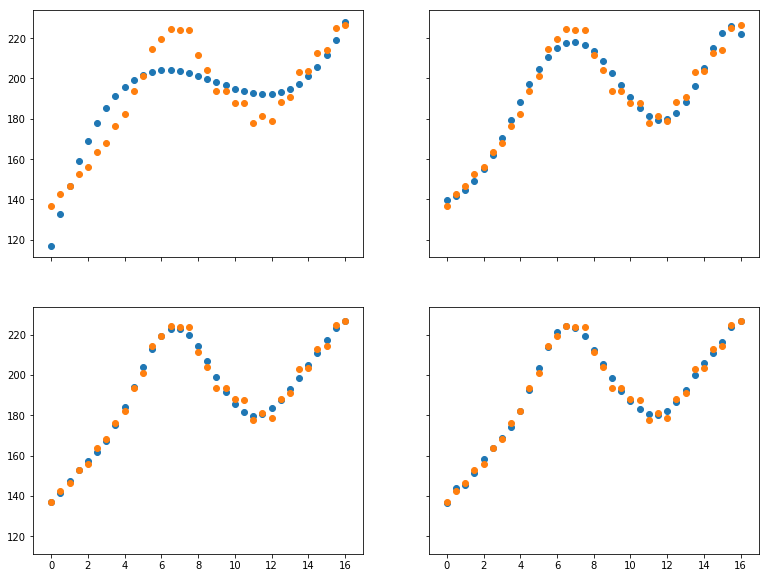

In [19]:
p3()

Problem 4

In [20]:

data = np.load('ellipse.npy')
x = data[:, 0]
y = data[:, 1]
A = np.array([x**2, x, x*y, y, y**2]).T
b = np.ones(len(A))
sigma = p1(A, b)
   
def p4(a, b, c, d, e):
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a * (cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b * cos_t + d * sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2 * A)
    plt.plot(r * cos_t, r * sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")
   

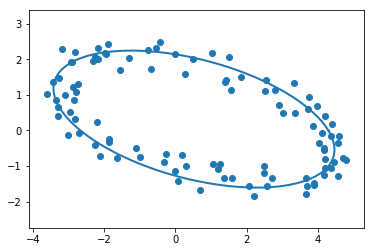

In [21]:
p4(*sigma)
plt.scatter(x, y)
plt.show()


Problem 5

In [27]:
#
def p5(A, N, tol):
    m, n = A.shape
    x = np.random.random(m)
    x = x /la.norm(x)
    count = 0
    diff = 10
    while (count< N) & (diff > tol):
        x_new = A @ x
        x_new = x_new / la.norm(x_new)
        diff = la.norm(x_new - x)
        x = x_new
        count= count+ 1
    return x.T @ A @ x, x

In [28]:
A = np.random.random((10, 10))
k,x=p5(A,1000,1e-10)

In [29]:
np.allclose(k,np.max(scipy.linalg.eigvals(A)))

True

Problem 6

In [30]:

def p6(A, N=1000, tol=1e-10):
    m, n = A.shape
    S = scipy.linalg.hessenberg(A)
    for k in range(N-1):
        Q, R = la.qr(S)
        S = R @ Q                   
    eigs = []
    i = 0     
    while i < n:        
        if (S[i, i] == np.diag(S)[-1]):
            eigs.append(S[i, i])
        elif S[i+1, i] < tol:
            eigs.append(S[i, i])
        else:
            a, b, c, d = S[i:i+2, i:i+2].flatten()
            λ_1 = (a + d) + (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            λ_2 = (a + d) - (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            eigs.extend([λ_1, λ_2])
            i = i + 1
        i = i + 1     
    return eigs


In [31]:
A = np.random.random((10, 10))
p6(A + A.T)

[10.593390090057017,
 2.5254713948616314,
 -1.7533007212823952,
 1.065972936443582,
 0.9124124374060724,
 -0.8431994817316435,
 -0.40296400235581314,
 0.3789545332023713,
 0.201508030603926,
 -0.1626466077188062]